In [94]:
#Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from matplotlib import pyplot


In [95]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [96]:
stock_prices=pd.read_csv('C:/Users/80214178/Downloads/HistoricalQuotes.csv',dayfirst=True, parse_dates=[0])
stock_prices.head()

,date,close,volume,open,high,low
0,2008-09-04,26.35,66138490,26.74,26.89,26.35
1,2008-09-05,25.65,82222430,26.03,26.22,25.63
2,2008-09-08,26.12,62109170,26.21,26.33,25.67
3,2008-09-09,26.10,85693570,26.20,26.60,26.05
4,2008-09-10,26.44,75042030,26.52,26.86,26.25


In [97]:
stock_prices['close']=stock_prices['close'].astype(np.float)

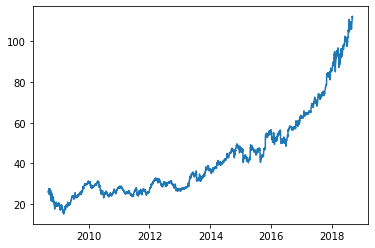

In [98]:
plt.plot(stock_prices['date'],stock_prices['close'])

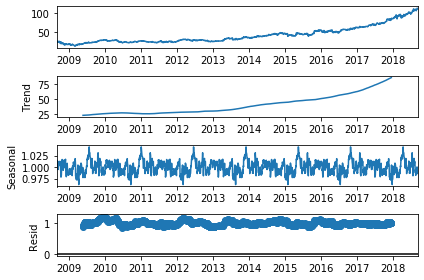

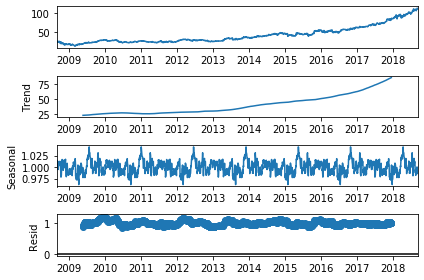

In [99]:
data_sea=pd.DataFrame({'close':np.array(stock_prices['close'])}, index=np.array(stock_prices['date']))
seasonal_decompose(data_sea, model='multiplicative',period=365).plot()

In [100]:
seasonality['flag']=np.where(seasonality[0]<.97,1,0)
np.where(seasonality['flag'] == 1)
#Al parecer la periodicidad es anual

(array([ 152,  517,  882, 1247, 1612, 1977, 2342], dtype=int64),)

In [101]:
stock_prices['lag1']=stock_prices['close'].shift(365)
stock_prices['lag2']=stock_prices['close'].shift(730)
stock_prices['lag3']=stock_prices['close'].shift(1095)
stock_prices['lag4']=stock_prices['close'].shift(1460)
stock_prices.head()

,date,close,volume,open,high,low,lag1,lag2,lag3,lag4
0,2008-09-04,26.35,66138490,26.74,26.89,26.35,NaN,NaN,NaN,NaN
1,2008-09-05,25.65,82222430,26.03,26.22,25.63,NaN,NaN,NaN,NaN
2,2008-09-08,26.12,62109170,26.21,26.33,25.67,NaN,NaN,NaN,NaN
3,2008-09-09,26.10,85693570,26.20,26.60,26.05,NaN,NaN,NaN,NaN
4,2008-09-10,26.44,75042030,26.52,26.86,26.25,NaN,NaN,NaN,NaN


In [102]:
stock_prices.dropna(axis = 0, how = 'any', inplace = True)
stock_prices.head()

,date,close,volume,open,high,low,lag1,lag2,lag3,lag4
1460,2014-06-24,41.75,26499460,41.83,41.94,41.56,26.46,27.72,28.59,26.35
1461,2014-06-25,42.03,20038340,41.70,42.05,41.46,26.83,27.40,28.97,25.65
1462,2014-06-26,41.72,23604390,41.93,41.94,41.43,26.89,27.27,28.77,26.12
1463,2014-06-27,42.25,70385440,41.61,42.29,41.51,27.21,26.80,28.73,26.10
1464,2014-06-30,41.70,30790300,42.17,42.21,41.70,27.04,26.92,28.33,26.44


In [103]:
X=stock_prices[['lag1','lag2','lag3','lag4']]
Y=stock_prices[['close']]

In [104]:
train_X, test_X = X[0:1028], X[1028:len(X)]
train_Y, test_Y = Y[0:1028], Y[1028:len(X)]

print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train_X)))
print('Testing Observations: %d' % (len(test_X)))

Observations: 1058
Training Observations: 1028
Testing Observations: 30


In [110]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [111]:
regressor.fit(train_X,train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [107]:

y_pred = regressor.predict(test_X)

In [108]:
print('Accuracy: %d ' % (100-mean_absolute_error(test_Y, y_pred)))

Accuracy: 94 


C:\Users\80214178\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


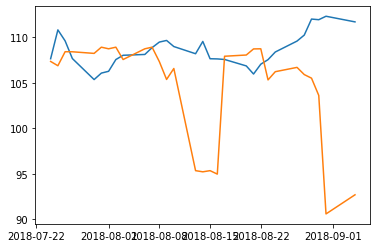

In [112]:
test_Y.index=stock_prices.iloc[1028:len(X),0]
test_Y['pred']=y_pred
plt.plot(test_Y)